In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "../Resources.2/final_temperature_change.csv"
temp_anom_df = pd.read_csv(file_path)
temp_anom_df

,country_code_alpha_three,year,temp_change_celsius
0,AFG,1970,0.898
1,AFG,1971,0.652
2,AFG,1972,-1.089
3,AFG,1973,0.262
4,AFG,1974,-0.470
...,...,...,...
11543,ZWE,2016,1.051
11544,ZWE,2017,0.116
11545,ZWE,2018,0.405
11546,ZWE,2019,0.939


In [7]:
rus_temp_anom_df= temp_anom_df[(temp_anom_df['country_code_alpha_three'] == 'RUS')]
rus_temp_anom_df.head()

,country_code_alpha_three,year,temp_change_celsius
8610,RUS,1992,0.364
8611,RUS,1993,0.954
8612,RUS,1994,0.575
8613,RUS,1995,2.105
8614,RUS,1996,0.807


In [8]:
rus_temp_anom_df= rus_temp_anom_df.drop(['country_code_alpha_three'], axis=1)
rus_temp_anom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 8610 to 11037
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 51 non-null     int64  
 1   temp_change_celsius  51 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


In [9]:
rus_temp_anom_df = rus_temp_anom_df.dropna( )

In [10]:
rus_temp_anom_df.head()

,year,temp_change_celsius
8610,1992,0.364
8611,1993,0.954
8612,1994,0.575
8613,1995,2.105
8614,1996,0.807


In [11]:
rus_temp_anom_df.set_index('year',inplace = True)
rus_temp_anom_df.head()

,temp_change_celsius
year,
1992,0.364
1993,0.954
1994,0.575
1995,2.105
1996,0.807


AxesSubplot(0.125,0.125;0.775x0.755)


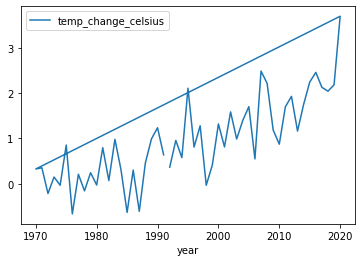

In [12]:
axis = rus_temp_anom_df.plot.line(y='temp_change_celsius',rot=0)
print(axis)
plt.show()

In [13]:
rus_temp_anom_df= rus_temp_anom_df.sort_values('temp_change_celsius',ascending=False)
rus_temp_anom_df.head(10)

,temp_change_celsius
year,
2020,3.693
2007,2.483
2016,2.454
2015,2.241
2008,2.213
2019,2.181
2017,2.125
1995,2.105
2018,2.040


In [14]:
rus_temp_anom_df.describe()

,temp_change_celsius
count,51.000000
mean,0.947686
std,0.927571
min,-0.667000
25%,0.301500
50%,0.852000
75%,1.639000
max,3.693000


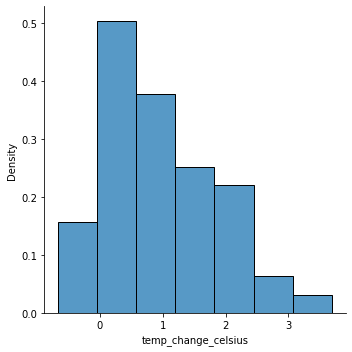

In [15]:
import seaborn as sb

# Extract feature we're interested in
data = rus_temp_anom_df['temp_change_celsius']

# Generate histogram/distribution plot
sb.displot(data, stat="density")

plt.show()

In [16]:
data.head()

year
2020    3.693
2007    2.483
2016    2.454
2015    2.241
2008    2.213
Name: temp_change_celsius, dtype: float64

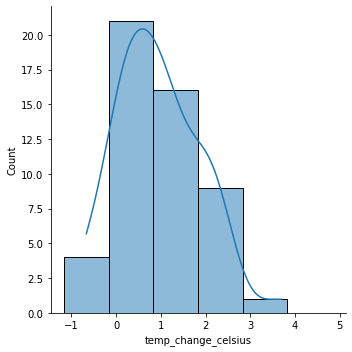

In [17]:
sb.displot(data, discrete = True, kde = True)
plt.show()

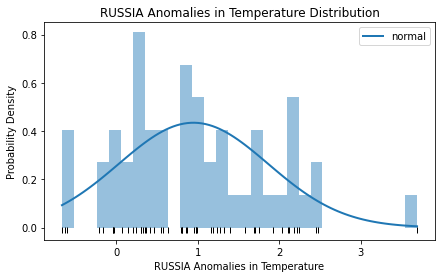

In [18]:
# Histogram
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data), max(data), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data, np.full_like(data, -0.01), '|k', markeredgewidth=1)
ax.set_title('RUSSIA Anomalies in Temperature Distribution')
ax.set_xlabel('RUSSIA Anomalies in Temperature')
ax.set_ylabel('Probability Density')
ax.legend();

C:\Users\splt1\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


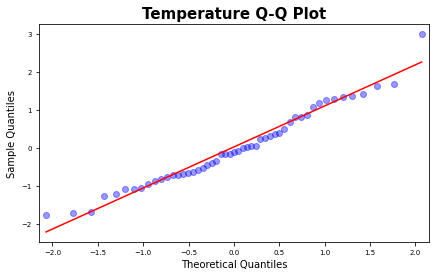

In [19]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Temperature Q-Q Plot', fontsize = 15,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [20]:
print('Kursotis:', stats.kurtosis(data))
print('Skewness:', stats.skew(data))

Kursotis: 0.0335427150879446
Skewness: 0.5001495238215306


In [21]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(data)
shapiro_test

ShapiroResult(statistic=0.9702066779136658, pvalue=0.2255740463733673)

In [22]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(data)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 2.662121905420963, p-value = 0.26419681223049396
